In [2]:
import models
from segmentation.dataset.OXFORD import OXFORDLoader
from segmentation.dataset.PASCALContext import PASCALContextLoader
import matplotlib.pyplot as plt
import numpy as np

In [3]:
model = models.HRNet((480, 480, 3), 48).build_hrnet('segmentation', 60, 0.0001)
model.load_weights('./segmentation/ckpt/context_segmentation_final')

In [4]:
loader = PASCALContextLoader(train_path='./segmentation/dataset/tfrecords/train_PASCALContext.tfrecord',
                                     val_path='./segmentation/dataset/tfrecords/val_PASCALContext.tfrecord',
                                     height=480, width=480, batch_size=4)
train_ds, val_ds = loader.get_train_val_ds()

In [22]:
for i in train_ds.take(2):
    sample = i
    
sample[0].shape, sample[1].shape

(TensorShape([4, 480, 480, 3]), TensorShape([4, 480, 480, 1]))

In [23]:
pred = model.predict(sample[0])

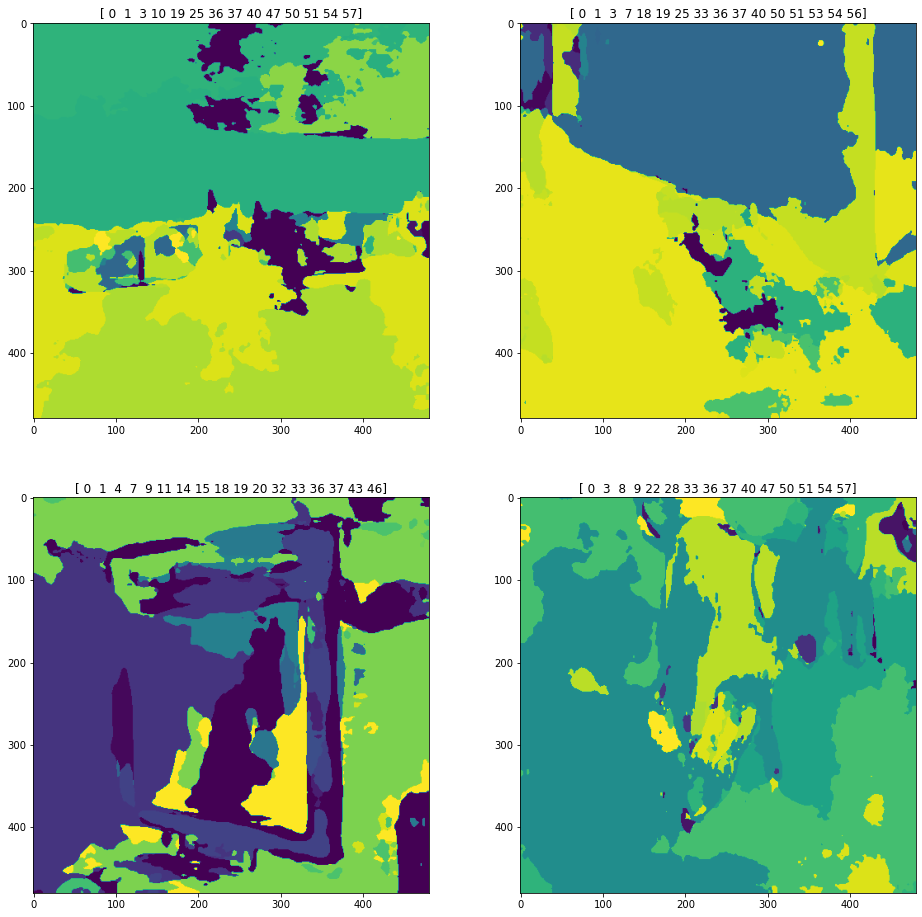

In [24]:
plt.figure(figsize=(16, 16))
for i in range(4):
    mask = np.argmax(pred[i], axis=-1)
    # mask = np.where(mask == 21, 255, mask)
    plt.subplot(2, 2, i + 1)
    plt.title(np.unique(mask))
    plt.imshow(mask)

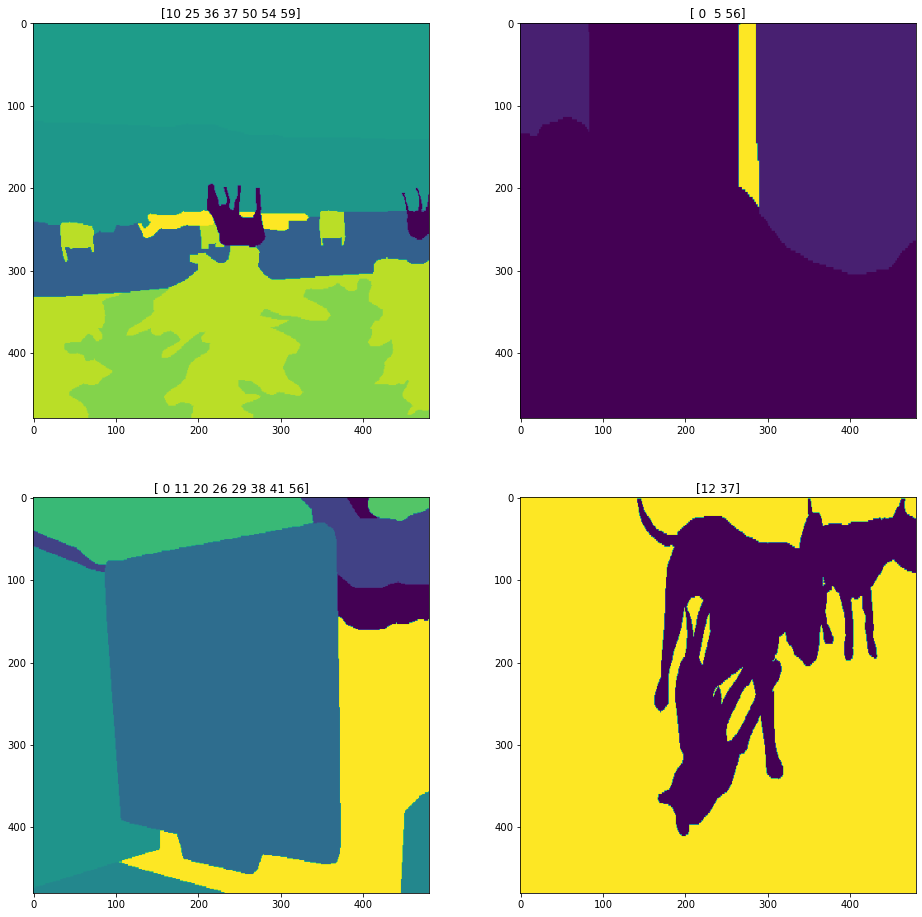

In [28]:
plt.figure(figsize=(16, 16))
for i in range(4):
    mask = sample[1][i][..., 0].numpy()
    # mask = np.where(mask == 21, 255, mask)
    plt.subplot(2, 2, i + 1)
    plt.title(np.unique(mask))
    plt.imshow(mask)

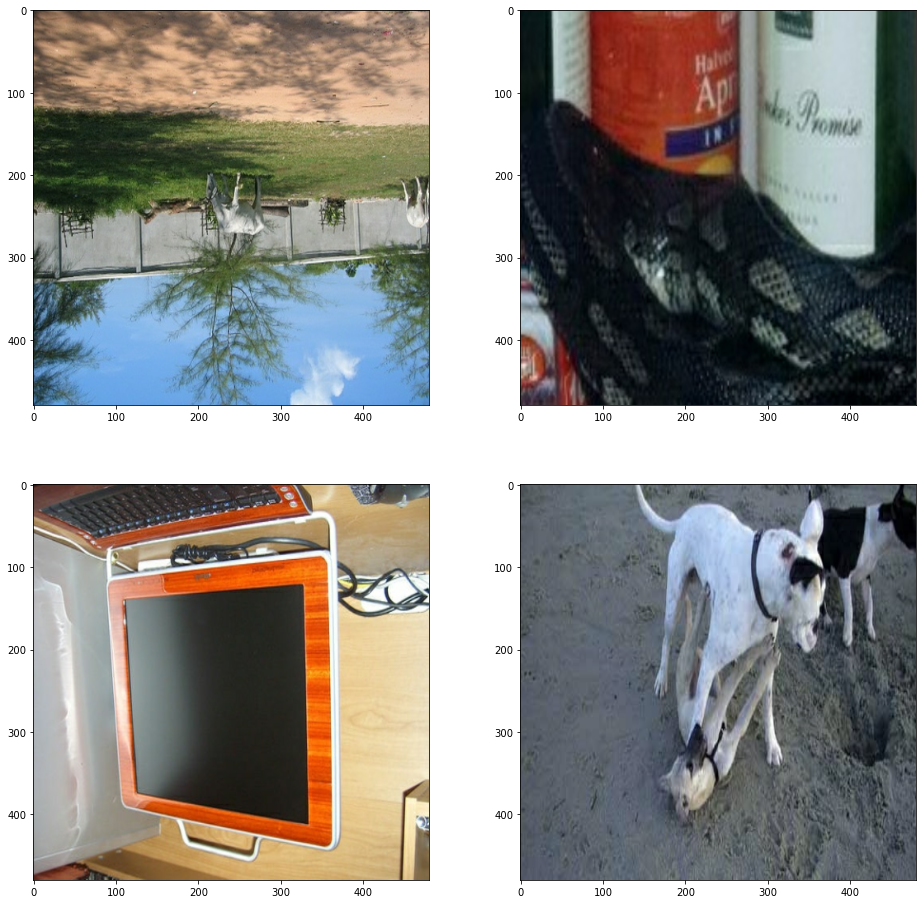

In [29]:
plt.figure(figsize=(16, 16))
for i in range(4):
    image = sample[0][i].numpy()
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)

In [30]:
import tensorflow as tf

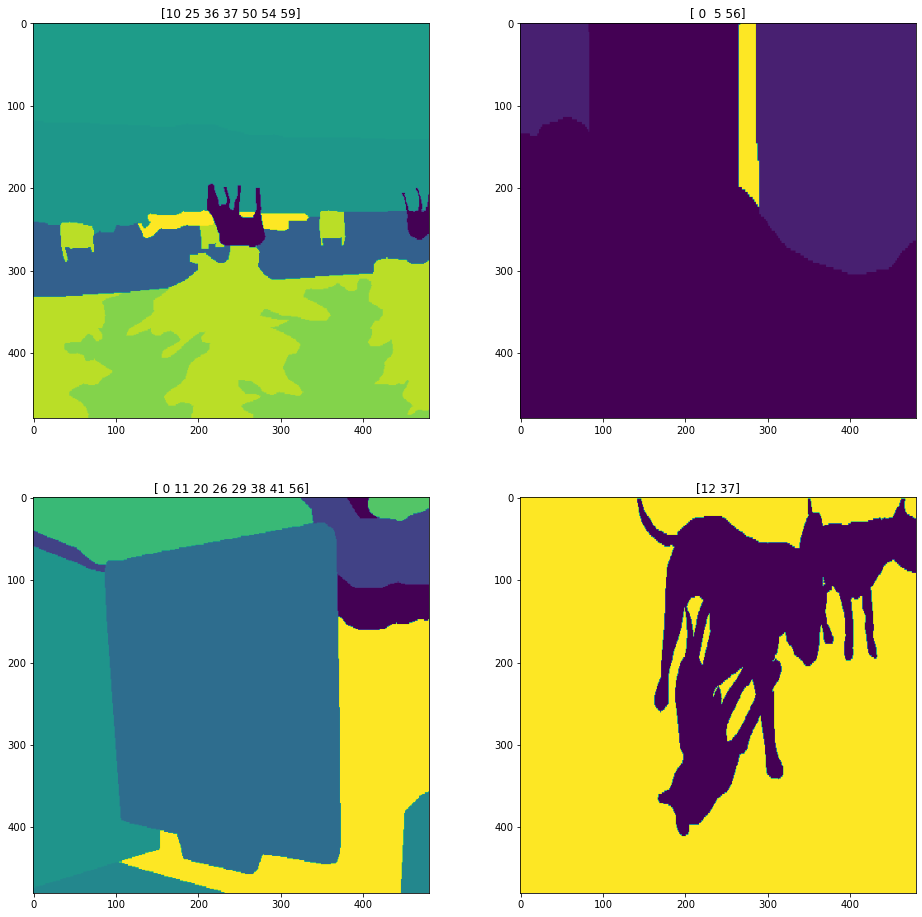

In [37]:
cat = tf.keras.utils.to_categorical(sample[1], num_classes=60)
plt.figure(figsize=(16, 16))
for i in range(4):
    mask = np.argmax(cat[i], axis=-1)
    # mask = np.where(mask == 21, 255, mask)
    plt.subplot(2, 2, i + 1)
    plt.title(np.unique(mask))
    plt.imshow(mask)